<a href="https://colab.research.google.com/github/chicew/ICTP-selection-assignment/blob/main/pycWB_GW190521_074359.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 安装一些东西

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


In [2]:
!mamba install -c conda-forge -y -q healpix_cxx=3.81 root=6.26.10 cmake pkg-config
!mamba install -c conda-forge -y -q nds2-client python-nds2-client

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... 

done
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [1]:
!pip install pycwb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.

## the example user parameter file

In [1]:
user_parameters = """
analysis: "2G"
cfg_search: "r"

optim: False

###### network configuration ######
ifo: ["L1","H1"]
refIFO: "L1"

inRate: 16384
# lags
lagSize: 1
lagStep: 1.
lagOff: 0
lagMax: 0

# superlags
slagSize: 0 # number of super lags (simulation=1) - if slagSize=0 -> Standard Segments
slagMin: 0
slagMax: 0
slagOff: 0

# job
segLen: 1200
segMLS: 600
segTHR: 200
segEdge: 10

# frequency
fLow: 16.
fHigh: 1024.


levelR: 3
l_low: 4 # low frequency resolution level		// std (sthr = 2)
l_high: 10 # high frequency resolution level	// std (sthr = 8)

wdmXTalk: "wdmXTalk/OverlapCatalog16-1024.bin"

healpix: 7

###### cWB production thresholds & regulators ######

bpp: 0.001
subnet: 0.5
subcut: 0.0
netRHO: 5.5
# cedRHO: 5.0
netCC: 0.5
Acore: 1.7
Tgap: 0.2
Fgap: 128.0
delta: 0.5
cfg_gamma: -1.0
LOUD: 300

pattern: 5

iwindow: 30

nSky: 196608

# simulation
# simulation: None
nfactor: 1
"""

with open('user_parameters.yaml', 'w') as fp:
  fp.write(user_parameters)

## 计算一些参数

In [2]:
import os

import pycwb
from pycwb.config import Config
from pycwb.modules.logger import logger_init

if not os.environ.get('HOME_WAT_FILTERS'):
   pyburst_path = os.path.dirname(os.path.abspath(pycwb.__file__))
   os.environ['HOME_WAT_FILTERS'] = f"{os.path.abspath(pyburst_path)}/vendor"

logger_init()

config = Config('./user_parameters.yaml')

Welcome to JupyROOT 6.26/10
Loading wavelet library
Trying to load wavelet library from /usr/local/lib/python3.10/site-packages/lib/wavelet.so


/usr/local/lib/python3.10/site-packages/ROOT/_facade.py:153: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  return _orig_ihook(name, *args, **kwds)


24-04-23 06:34:43 - logger_init - INFO - Logging initialized
24-04-23 06:34:43 - logger_init - INFO - Logging level: INFO
24-04-23 06:34:43 - logger_init - INFO - Logging file: None
File OverlapCatalog16-1024.bin is available on https://github.com/PycWB/xtalk-data/raw/main.
File saved as /usr/local/lib/python3.10/site-packages/pycwb/vendor/wdmXTalk/OverlapCatalog16-1024.bin
24-04-23 06:34:51 - check_MRA_catalog - INFO - Checking MRA catalog
24-04-23 06:34:52 - load_MRA - INFO - Loading catalog of WDM cross-talk coefficients: /usr/local/lib/python3.10/site-packages/pycwb/vendor/wdmXTalk/OverlapCatalog16-1024.bin


In [3]:
from pycwb.modules.read_data import read_from_catalog, read_from_online
from gwpy.timeseries import TimeSeries

import requests
from gwosc.locate import get_urls
t0 = 1242459857.5

data = []
for ifo in config.ifo:
  url = get_urls(ifo, t0, t0)[-1]

  print('Downloading: ' , url)
  fn = os.path.basename(url)
  with open(fn,'wb') as strainfile:
    straindata = requests.get(url)
    strainfile.write(straindata.content)

  strain = TimeSeries.read(fn,format='hdf5.gwosc')
  d = strain.crop(t0-150, t0+150)
  d_resampled = d.resample(2048)
  data.append(d_resampled)

Downloading:  http://gwosc.org/eventapi/json/GWTC-2.1-confident/GW190521_074359/v2/L-L1_GWOSC_4KHZ_R1-1242457810-4096.hdf5
Downloading:  http://gwosc.org/eventapi/json/GWTC-2.1-confident/GW190521_074359/v2/H-H1_GWOSC_4KHZ_R1-1242457810-4096.hdf5


In [4]:
from pycwb.modules.data_conditioning import data_conditioning
from pycwb.modules.plot import plot_spectrogram

strains, nRMS = data_conditioning(config, data)

# plot the spectrogram for L1
plt = plot_spectrogram(strains[0], gwpy_plot=True)
ax = plt.gca()
ax.set_ylim(15,1024)

strains, nRMS

24-04-23 06:35:39 - whitening - INFO - WDM filter max length = 6.00048828125 (sec)
24-04-23 06:35:39 - whitening - INFO - WDM filter max length = 6.00048828125 (sec)
24-04-23 06:35:40 - data_conditioning - INFO - -------------------------------------------------------
24-04-23 06:35:40 - data_conditioning - INFO - Data Conditioning Time: 4.34 seconds
24-04-23 06:35:40 - data_conditioning - INFO - -------------------------------------------------------


((<pycwb.types.time_frequency_series.TimeFrequencySeries at 0x7db2e1906b60>,
  <pycwb.types.time_frequency_series.TimeFrequencySeries at 0x7db2e1906920>),
 (<pycwb.types.time_frequency_series.TimeFrequencySeries at 0x7db2e1906bc0>,
  <pycwb.types.time_frequency_series.TimeFrequencySeries at 0x7db2e1906da0>))

In [5]:
from pycwb.modules.coherence import coherence

# calculate coherence
fragment_clusters = coherence(config, strains, nRMS)

24-04-23 06:35:58 - coherence - INFO - Start coherence in parallel
level : 9	 rate(hz) : 4	 layers : 512	 df(hz) : 2.000000	 dt(ms) : 250.000000 
max energy in units of noise variance: 6.23759 
thresholds in units of noise variance: Eo=11.2251 Emax=22.4502 
live time in zero lag: 280 
lag | clusters | pixels 
  0 |       52 |   1097 
Coherence time for single level: 14.062490 s
level : 10	 rate(hz) : 2	 layers : 1024	 df(hz) : 1.000000	 dt(ms) : 500.000000 
max energy in units of noise variance: 6.7575 
thresholds in units of noise variance: Eo=16.8266 Emax=33.6531 
live time in zero lag: 280 
lag | clusters | pixels 
  0 |       33 |    552 
Coherence time for single level: 14.271055 s
level : 8	 rate(hz) : 8	 layers : 256	 df(hz) : 4.000000	 dt(ms) : 125.000000 
max energy in units of noise variance: 5.43077 
thresholds in units of noise variance: Eo=11.825 Emax=23.6501 
live time in zero lag: 280 
lag | clusters | pixels 
  0 |       53 |   1679 
Coherence time for single level: 14.

In [ ]:
 # %matplotlib inline
# from gwpy.spectrogram import Spectrogram
# for fragment_cluster in fragment_clusters:
#   for cluster in fragment_cluster.clusters:
#       merged_map, start, dt, df = cluster.get_sparse_map("likelihood")

#       plt = Spectrogram(merged_map, t0=start, dt=dt, f0=0, df=df).plot()
#       plt.colorbar()

In [6]:
from pycwb.modules.super_cluster import supercluster
from pycwb.types.network import Network

network = Network(config, strains, nRMS)

pwc_list = supercluster(config, network, fragment_clusters, strains)

24-04-23 06:36:24 - set_time_shift - INFO - lag step: 1.0
24-04-23 06:36:24 - set_time_shift - INFO - number of time lags: 1
24-04-23 06:36:28 - sparse_table_from_fragment_clusters - INFO - ----------------------------------------
24-04-23 06:36:28 - sparse_table_from_fragment_clusters - INFO - Sparse series time: 3.84 s
24-04-23 06:36:28 - sparse_table_from_fragment_clusters - INFO - ----------------------------------------
24-04-23 06:36:31 - supercluster - INFO - -> Processing lag=0 ...
24-04-23 06:36:31 - supercluster - INFO -    --------------------------------------------------
24-04-23 06:36:31 - supercluster - INFO -     coher clusters|pixels      :    363|9269
24-04-23 06:36:31 - supercluster - INFO -     super clusters|pixels      :    238|9269
24-04-23 06:36:31 - supercluster - INFO -    defrag clusters|pixels      :    195|9269
24-04-23 06:36:32 - supercluster - INFO -    subnet clusters|pixels      :     83|3697
24-04-23 06:36:32 - supercluster - INFO - Supercluster done
2

## 检测并获取事件

In [8]:
from pycwb.modules.likelihood import likelihood

events, clusters, skymap_statistics = likelihood(config, network, pwc_list)

-------------------------------------------------------
-> Processing 83 clusters in lag=0
   ----------------------------------------------------
Selected core pixels: 0
   cluster-id|pixels:     1|31
	 <- rejected    
Selected core pixels: 1
   cluster-id|pixels:     2|109
	 -> SELECTED !!!
Selected core pixels: 1
   cluster-id|pixels:     3|240
	 -> SELECTED !!!
Selected core pixels: 1
   cluster-id|pixels:     4|222
	 -> SELECTED !!!
Selected core pixels: 1
   cluster-id|pixels:     5|107
	 -> SELECTED !!!
Selected core pixels: 1
   cluster-id|pixels:     6|105
	 -> SELECTED !!!
Selected core pixels: 1
   cluster-id|pixels:     7|64
	 -> SELECTED !!!
Selected core pixels: 1
   cluster-id|pixels:     8|51
	 -> SELECTED !!!
Selected core pixels: 1
   cluster-id|pixels:     9|215
	 -> SELECTED !!!
Selected core pixels: 0
   cluster-id|pixels:    10|27
	 <- rejected    
Selected core pixels: 1
   cluster-id|pixels:    11|87
	 -> SELECTED !!!
Selected core pixels: 1
   cluster-id|pixels

## 做出时频图

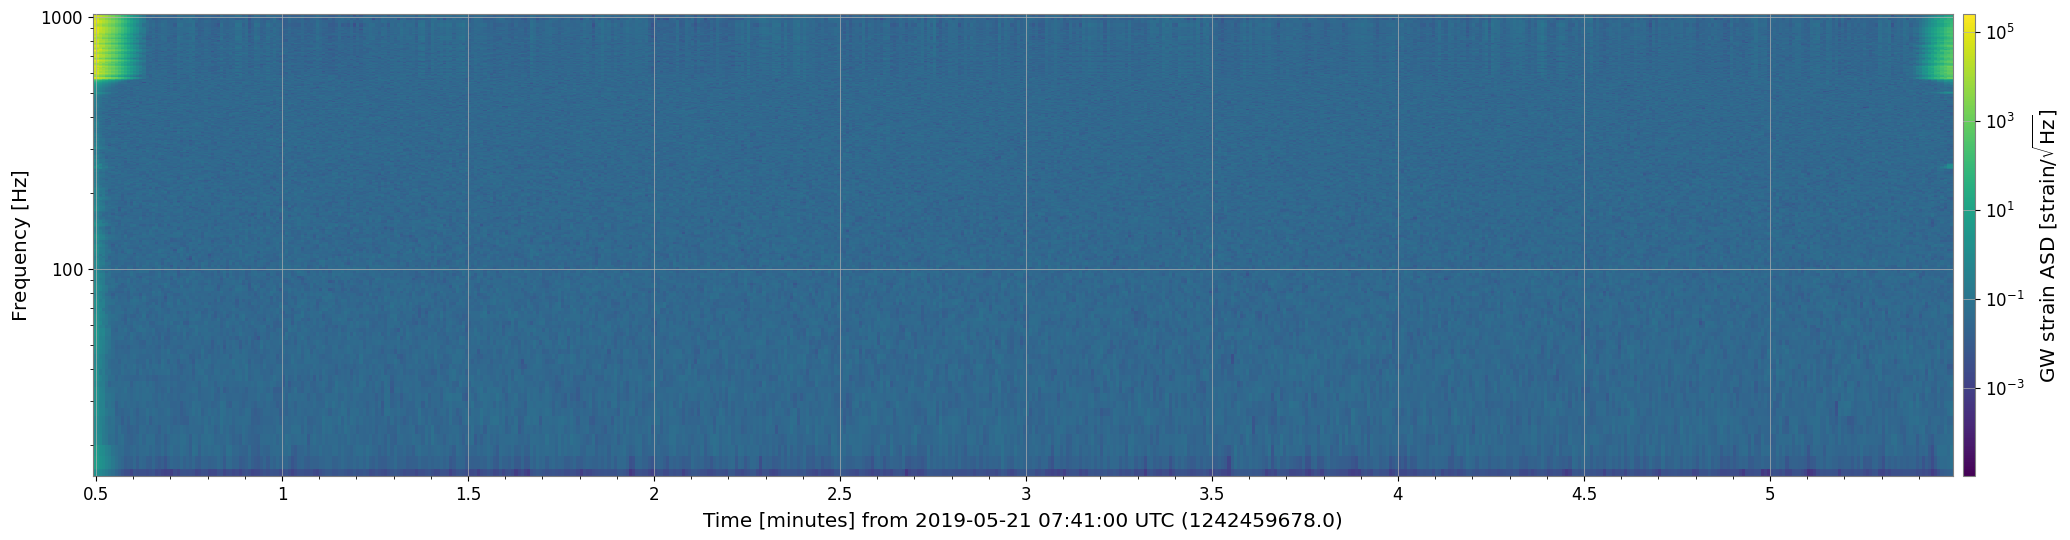

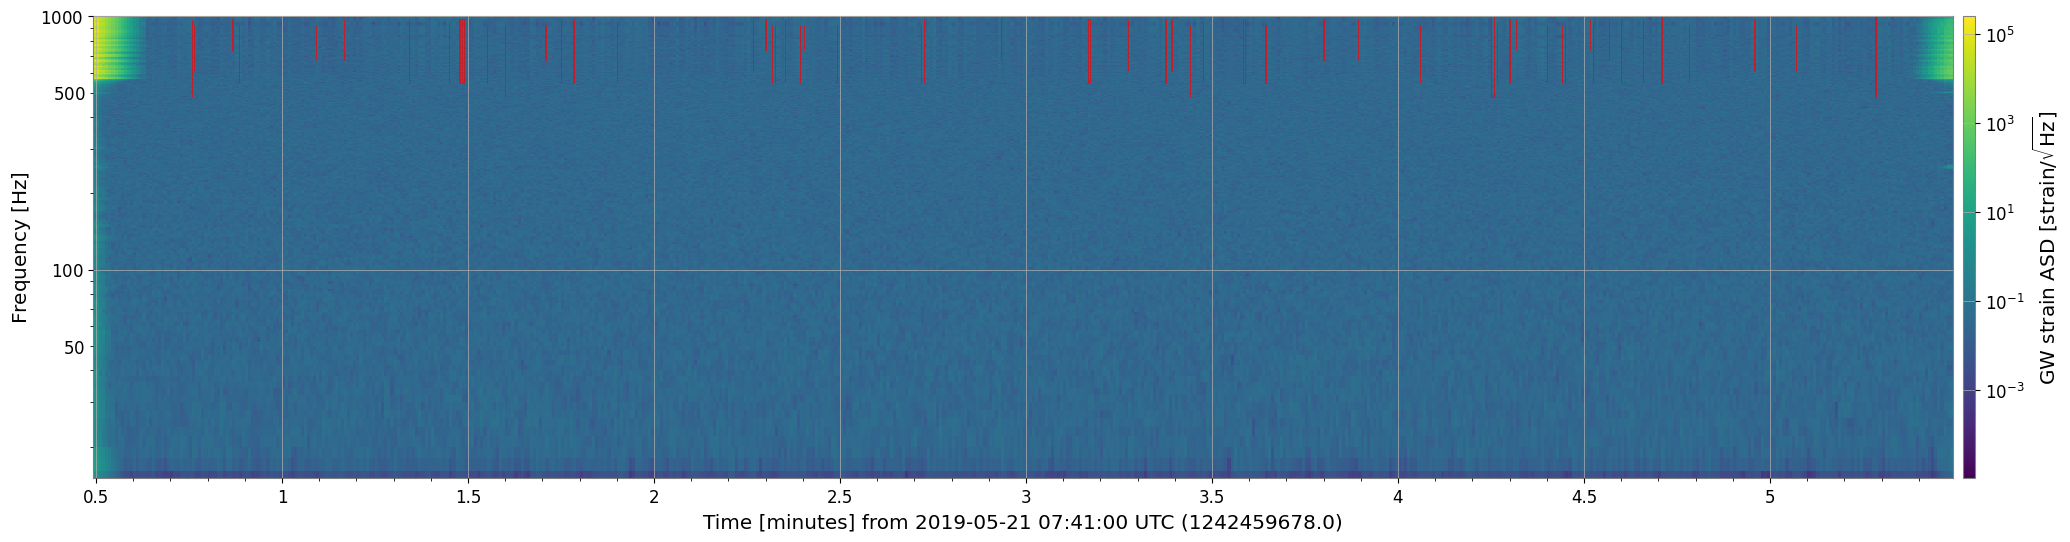

In [9]:
%matplotlib inline
from pycwb.modules.plot import plot_event_on_spectrogram

plt = plot_event_on_spectrogram(strains[0], events)
plt.show()

#下面是随便检测找一些envent来进行波形重构

(59.5, 59.9375)

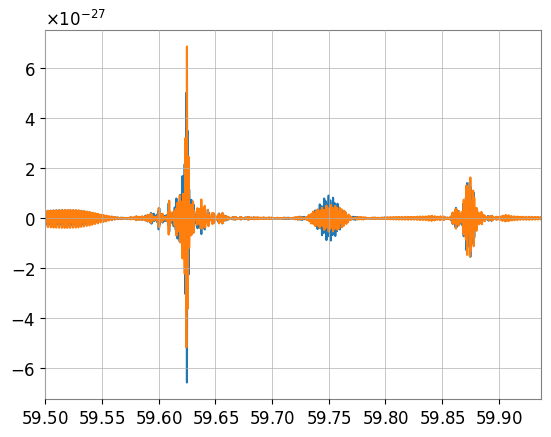

In [11]:
from pycwb.modules.reconstruction import get_network_MRA_wave
from pycwb.modules.plot.waveform import plot_reconstructed_waveforms
from matplotlib import pyplot as plt


event = events[1]
cluster = clusters[1]
reconstructed_waves = get_network_MRA_wave(config, cluster, config.rateANA, config.nIFO, config.TDRate,
             'signal', 0, True)
for reconstructed_wave in reconstructed_waves:
  plt.plot(reconstructed_wave.sample_times, reconstructed_wave.data)
plt.xlim((event.left[0], event.left[0] + event.stop[0] - event.start[0]))

(75.46875, 75.5625)

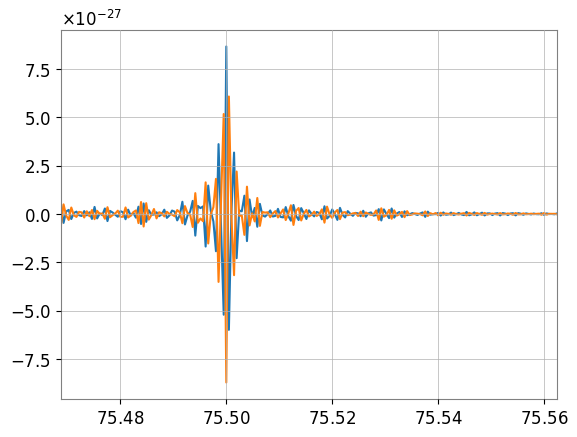

In [12]:
from pycwb.modules.reconstruction import get_network_MRA_wave
from pycwb.modules.plot.waveform import plot_reconstructed_waveforms
from matplotlib import pyplot as plt


event = events[4]
cluster = clusters[4]
reconstructed_waves = get_network_MRA_wave(config, cluster, config.rateANA, config.nIFO, config.TDRate,
             'signal', 0, True)
for reconstructed_wave in reconstructed_waves:
  plt.plot(reconstructed_wave.sample_times, reconstructed_wave.data)
plt.xlim((event.left[0], event.left[0] + event.stop[0] - event.start[0]))

(133.984375, 134.03125)

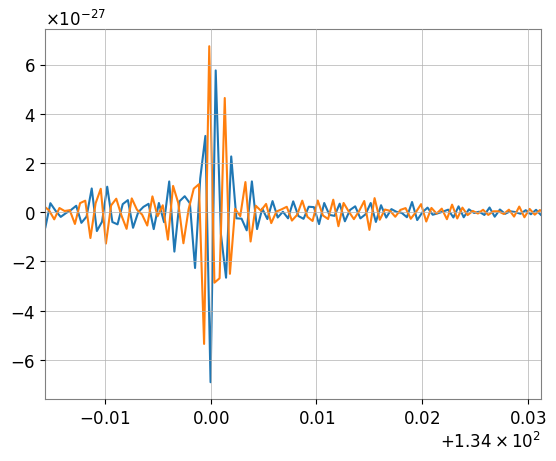

In [15]:
from pycwb.modules.reconstruction import get_network_MRA_wave
from pycwb.modules.plot.waveform import plot_reconstructed_waveforms
from matplotlib import pyplot as plt


event = events[22]
cluster = clusters[22]
reconstructed_waves = get_network_MRA_wave(config, cluster, config.rateANA, config.nIFO, config.TDRate,
             'signal', 0, True)
for reconstructed_wave in reconstructed_waves:
  plt.plot(reconstructed_wave.sample_times, reconstructed_wave.data)
plt.xlim((event.left[0], event.left[0] + event.stop[0] - event.start[0]))

(203.984375, 204.03125)

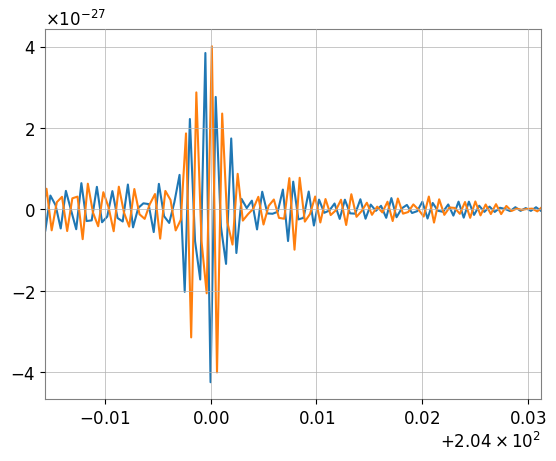

In [17]:
from pycwb.modules.reconstruction import get_network_MRA_wave
from pycwb.modules.plot.waveform import plot_reconstructed_waveforms
from matplotlib import pyplot as plt


event = events[32]
cluster = clusters[32]
reconstructed_waves = get_network_MRA_wave(config, cluster, config.rateANA, config.nIFO, config.TDRate,
             'signal', 0, True)
for reconstructed_wave in reconstructed_waves:
  plt.plot(reconstructed_wave.sample_times, reconstructed_wave.data)
plt.xlim((event.left[0], event.left[0] + event.stop[0] - event.start[0]))

(35.9921875, 36.015625)

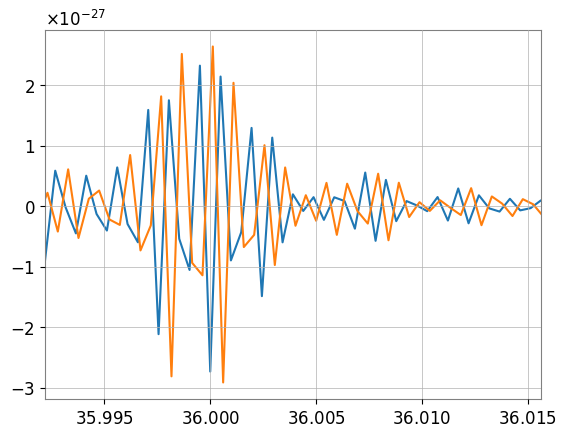

In [18]:
from pycwb.modules.reconstruction import get_network_MRA_wave
from pycwb.modules.plot.waveform import plot_reconstructed_waveforms
from matplotlib import pyplot as plt


event = events[44]
cluster = clusters[44]
reconstructed_waves = get_network_MRA_wave(config, cluster, config.rateANA, config.nIFO, config.TDRate,
             'signal', 0, True)
for reconstructed_wave in reconstructed_waves:
  plt.plot(reconstructed_wave.sample_times, reconstructed_wave.data)
plt.xlim((event.left[0], event.left[0] + event.stop[0] - event.start[0]))

下面两个是在频谱图中略宽的

# 下面三个是在时频图中略宽的event

(15.984375, 16.03125)

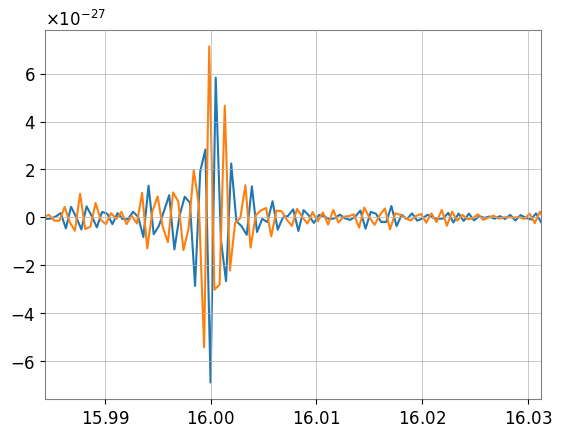

In [20]:
from pycwb.modules.reconstruction import get_network_MRA_wave
from pycwb.modules.plot.waveform import plot_reconstructed_waveforms
from matplotlib import pyplot as plt


event = events[10]
cluster = clusters[10]
reconstructed_waves = get_network_MRA_wave(config, cluster, config.rateANA, config.nIFO, config.TDRate,
             'signal', 0, True)
for reconstructed_wave in reconstructed_waves:
  plt.plot(reconstructed_wave.sample_times, reconstructed_wave.data)
plt.xlim((event.left[0], event.left[0] + event.stop[0] - event.start[0]))

(185.484375, 185.78125)

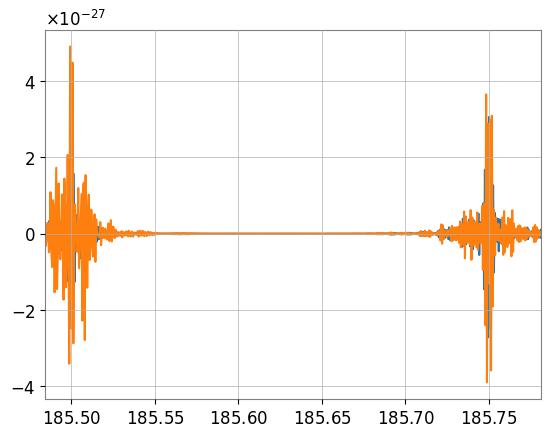

In [21]:
from pycwb.modules.reconstruction import get_network_MRA_wave
from pycwb.modules.plot.waveform import plot_reconstructed_waveforms
from matplotlib import pyplot as plt


event = events[28]
cluster = clusters[28]
reconstructed_waves = get_network_MRA_wave(config, cluster, config.rateANA, config.nIFO, config.TDRate,
             'signal', 0, True)
for reconstructed_wave in reconstructed_waves:
  plt.plot(reconstructed_wave.sample_times, reconstructed_wave.data)
plt.xlim((event.left[0], event.left[0] + event.stop[0] - event.start[0]))

(228.484375, 228.53125)

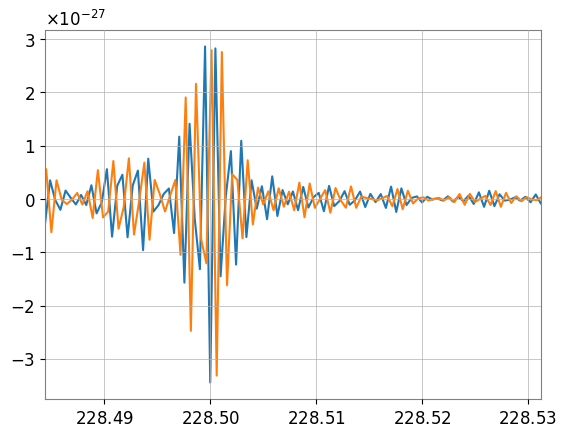

In [22]:
from pycwb.modules.reconstruction import get_network_MRA_wave
from pycwb.modules.plot.waveform import plot_reconstructed_waveforms
from matplotlib import pyplot as plt


event = events[34]
cluster = clusters[34]
reconstructed_waves = get_network_MRA_wave(config, cluster, config.rateANA, config.nIFO, config.TDRate,
             'signal', 0, True)
for reconstructed_wave in reconstructed_waves:
  plt.plot(reconstructed_wave.sample_times, reconstructed_wave.data)
plt.xlim((event.left[0], event.left[0] + event.stop[0] - event.start[0]))

# 最后看一下events的数据

In [23]:
events

[Event(nevent=0, ndim=0, run=0, rho=[0, 0, 0], netcc=[0, 0, 0], neted=[0, 0, 0], gnet=0.0, anet=0.0, inet=0.0, ecor=0.0, norm=0.0, ECOR=0.0, penalty=0.0, likelihood=0.0, factor=0.0, range=[], chirp=[], eBBH=[], usize=0.0, ifo_list=[], eventID=[0, 0, 0], type=[0, 0, 0], name=[], log=[], rate=[], volume=[], size=[], gap=[], lag=[], slag=[0, 0, 0], strain=[], phi=[], theta=[], psi=[], iota=[], bp=[], bx=[], time=[], gps=[], right=[], left=[], duration=[], start=[], stop=[], frequency=[], low=[], high=[], bandwidth=[], hrss=[], noise=[], erA=[], Psm=[], null=[], nill=[], mass=[], spin=[], snr=[], xSNR=[], sSNR=[], iSNR=[], oSNR=[], ioSNR=[], Deff=[]),
 Event(nevent=1, ndim=2, run=0, rho=[6.133118629455566, 2.208854405249523, 0], netcc=[0, 0, 0], neted=[0, 0, 0, 0, 0], gnet=0.9698811173439026, anet=0.0070108831860125065, inet=0.0, ecor=197.7908172607422, norm=1.8752566576004028, ECOR=0.0, penalty=0, likelihood=533.793212890625, factor=0.0, range=[0], chirp=[0, 2.4000155925750732, 0.19088481